In [1]:
import os, glob
import numpy as np
from pyproj import CRS
import geopandas as gpd
import rasterio
import matplotlib.pyplot as plt
import geopandas
import pandas as pd
import json
from zipfile import ZipFile
#from scipy.signal import medfilt2d
from rasterstats import zonal_stats

In [2]:
#shapefile directory
shp_dir = os.getcwd()[:36]+r'\Data\boundary_shp'

#rasterfile_temp directory
tif_dir = os.getcwd()[:36]+r'\Data\temp_month'

epsg:4326
2456


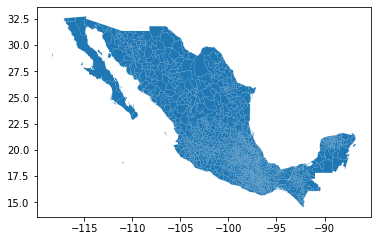

In [3]:
#mexico_district shapefile
mex_district = geopandas.read_file(shp_dir+r'\mex_admbnda_adm2_govmex_20200618.shp')
print(mex_district.crs)
print(len(mex_district))
mex_district.plot()

#ADM2_PCODE is the unique district ID
subset=['Shape_Area', 'ADM2_ES', 'ADM2_PCODE']
mex_district_id = mex_district[subset]

## 1.  CHIRTS_Zonal Statistics_monthly mean/std/max/min

In [4]:
#Tmax data list
tmax_list = glob.glob(tif_dir+r'\*.tif')
tmax_list = [x for x in tmax_list if not '2004' in x] #exclude 2004
#Shapefile
shpfile= shp_dir+r'\mex_admbnda_adm2_govmex_20200618.shp'

In [5]:
#Check CRS Match

raster=[]

for f in tmax_list:
    raster.append(rasterio.open(f))
    for i in raster:
        if i.crs == mex_district.crs:
            print('True')    

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [6]:
# zonal_mean function
def zonal_mean (shpfile, rasfile):
    temp = pd.DataFrame(zonal_stats(shpfile,\
                                         rasfile,\
                                         stats=("mean","std",'max','min'), nodata=np.nan))\
                                         .astype('float16').reset_index()
    return temp

In [7]:
## Compute Zonal Statiscs at the district level and rename columns

mini=[]
maxi=[]
mean=[]
std=[]

result=[]

# Compute Zonal Statiscs at the district level using zonal_mean functiona
for i,j in enumerate(tmax_list):
    #set column name
    mini.append('min_'+'tmax'+tmax_list[i][-12:-4].replace(".", "_"))
    maxi.append('max_'+'tmax'+tmax_list[i][-12:-4].replace(".", "_"))
    mean.append('mean_'+'tmax'+tmax_list[i][-12:-4].replace(".", "_"))
    std.append('std_'+'tmax'+tmax_list[i][-12:-4].replace(".", "_"))
    #put them in result list
    result.append(zonal_mean(shpfile, j))

temp_clean=[]
# rename column
for l,k in enumerate(result):
    mn = mini[l]
    mx = maxi[l]
    nm = mean[l]
    sd = std[l]
    temp_clean.append(k.rename(columns={'min':mn,'max':mx,'mean':nm,'std':sd}))

In [8]:
## Merge district Tmax_mean

from functools import reduce
Tmax=reduce(lambda x, y: pd.merge(x, y, on='index'), temp_clean)

In [12]:
# Disaggregate by each year

Tmax_2009 = Tmax[[x for x in Tmax if "2009" in x]]
Tmax_2014 = Tmax[[x for x in Tmax if "2014" in x]]

Tmax_2009['year']='2009'
Tmax_2014['year']='2014'

# drop district with negative values
Tmax_2009 = Tmax_2009[Tmax_2009.mean_tmax_2009_01 > 0]
Tmax_2014 = Tmax_2014[Tmax_2014.mean_tmax_2014_01 > 0]

<ipython-input-12-7143e5369b4d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tmax_2009['year']='2009'
<ipython-input-12-7143e5369b4d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tmax_2014['year']='2014'


In [13]:
#Tmax_2004_month = mex_district.join(Tmax_2004)
Tmax_2009_month = mex_district_id.join(Tmax_2009)
Tmax_2014_month = mex_district_id.join(Tmax_2014)

# 2. CHIRPS

In [14]:
#prec data list
prec_dir = os.getcwd()[:36]+r'\Data\chirps'
prec_list = glob.glob(prec_dir+r'\*.tif')

#Shapefile
shpfile= shp_dir+r'\mex_admbnda_adm2_govmex_20200618.shp'

In [15]:
#Check CRS Match
raster=[]

for f in prec_list:
    raster.append(rasterio.open(f))
    for i in raster:
        if i.crs == mex_district.crs:
            print('True')    

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [16]:
## Compute Zonal Statiscs at the district level and rename columns

mini=[]
maxi=[]
mean=[]
std=[]

result=[]

# Compute Zonal Statiscs at the district level using zonal_mean functiona
for i,j in enumerate(prec_list):
    #set column name
    mini.append('min_'+'prec'+prec_list[i][-12:-4].replace(".", "_"))
    maxi.append('max_'+'prec'+prec_list[i][-12:-4].replace(".", "_"))
    mean.append('mean_'+'prec'+prec_list[i][-12:-4].replace(".", "_"))
    std.append('std_'+'prec'+prec_list[i][-12:-4].replace(".", "_"))
    #put them in result list
    result.append(zonal_mean(shpfile, j))

prec_clean=[]
# rename column
for l,k in enumerate(result):
    mn = mini[l]
    mx = maxi[l]
    nm = mean[l]
    sd = std[l]
    prec_clean.append(k.rename(columns={'min':mn,'max':mx,'mean':nm,'std':sd}))

In [17]:
## Merge district Tmax_mean

from functools import reduce
Prec=reduce(lambda x, y: pd.merge(x, y, on='index'), prec_clean)

In [18]:
# Disaggregate by each year

Prec_2009 = Prec[[x for x in Prec if "2009" in x]]
Prec_2014 = Prec[[x for x in Prec if "2014" in x]]

Prec_2009['year']='2009'
Prec_2014['year']='2014'

# drop district with negative values
Prec_2009 = Prec_2009[Prec_2009.min_prec_2009_01 > 0]
Prec_2014 = Prec_2014[Prec_2014.min_prec_2014_01 > 0]

#Tmax_2004_month = mex_district.join(Tmax_2004)
Prec_2009_month = mex_district_id.join(Prec_2009)
Prec_2014_month = mex_district_id.join(Prec_2014)

<ipython-input-18-48f4ef281f67>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Prec_2009['year']='2009'
<ipython-input-18-48f4ef281f67>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Prec_2014['year']='2014'


## export result

In [19]:
save_path = os.getcwd()[:-8]+r'Output'
save_path

'C:\\Users\\ck24\\ACE_592\\Pollution_Sp21\\Output'

In [20]:
#Tmax_2004_month.to_csv(save_path+r'\monthly_tmax_2004.csv', index=False)
Tmax_2009_month.to_csv(save_path+r'\monthly_tmax_2009.csv', index=False)
Tmax_2014_month.to_csv(save_path+r'\monthly_tmax_2014.csv', index=False)
Prec_2009_month.to_csv(save_path+r'\monthly_prec_2009.csv', index=False)
Prec_2014_month.to_csv(save_path+r'\monthly_prec_2014.csv', index=False)
#.to_csv(save_path+r'\monthly_tmax_2014.csv', index=False)